   - By: Billy Davila
   - Email: billdavila97@yahoo.com
   - Reference: A review of two decades of correlations, hierarchies, networks and clustering in financial markets

# Introduction


Kruskal's algorithm has been widely used for calculating a minimum spanning tree. The algorithm takes a graph as input and finds a subset of the edges of that graph that form a tree. This tree must include every vertex and have the minimum sum of weights among all trees that can be formed from the graph. 

In this notebook, we are going to implement Kruskal's algorithm inside a class called 'Graph'. The data used will be the adjusted price of 50 shares and then calculate their distances which will represent the weights. For calculating their respective distances, we'll need their correlation and the distance formula. After getting the distances, we can use the class to get the minimum spanning tree between the 50 shares in relation to their distances.


# Libraries used

In [1]:
import yfinance as yf  # helps us download stocks data from yahoo
import numpy as np  # helps us get numpy arrays
import pandas as pd  # helps us use data__frame
import math  # helps use math function, we'll use sqrt root
import networkx as nx  # helps us to graph the minimum spanning tree with nodes
import matplotlib.pyplot as plt  # helps us to plot 2d graphs
from scipy.cluster.hierarchy import dendrogram, linkage  # help us on graphing the dendrogram
from scipy.spatial.distance import pdist, squareform  # help us calculate the cluster structure

# Graph Class and the implementation of Kruskal's algorithm

We'll create an object graph that has as input the number of vertices of the graph. It has two attributes which are the number of vertices and a list containing all its edges. The graph also has several member methods. One method can add edges to the list of edges. The graph can also add two subtrees with another member function. The graph can also find the root of a given vertex. And the last method can implement Kruskal's algorithm and return a minimum spanning tree.

The way Kruskal's algorithm works is by first sorting all the edges with their respected weights in non-decreasing order. Then, we'll go through a loop until we have the V - 1 edges needed. There is going to be an empty list to store the sorted edges. However, we can only add the edge if and only if they do not form a cycle otherwise it will not be a tree. The way we check if there is not a cycle, it's by checking if they share the same root. If they share the same root, then it will form a cycle and we can add it. Repeat the process until we have passed to all the vertex and then return the list.


In [2]:
# we need a class of a graph


class Graph:
    """
    The class of a connected graph G = (V,E)

    attributes:
        vertices (int): number of vertices.
        graph  (nested list) : list of two edges with their respected weights.
    """

    # constructor
    def __init__(self, vertices):
        """
        The constructor for the class Graph.

        Parameters:
            vertices (int): number of vertices.
        """
        self.V = vertices  # number of vertices.
        self.graph = []   # nested list composed of smaller
        # list of two edges with their respected distance.

    # member function to add an edge with their weights to the grap
    def addEdge(self, vertex_u, vertex_v, weight):
        """
        Function to add another edge to the attribute graph.

        Parameters:
           vertex_u (int): first numbered vertex.
           vertex_v (int): second numbered vertex.
           weight (float): the weight(distance) between the two vertex.
        """
        # just add the given edge to the property graph.
        self.graph.append([vertex_u, vertex_v, weight])

    def find(self, parent, i):
        """
        Function to find set of a given vertex i

        Parameters:
            parent (list of int): list of vertices
            i  (int) : a vertex
        Returns:
            a list of vertices
        """
        if parent[i] == i:  # if they are the same just return i
            return i
        # call it again (recursion) and keep track of the parent node.
        return self.find(parent, parent[i])

    # A function that does union of two sets of x and y
    # (uses union by rank)
    def union(self, parent, rank, x, y):
        """
        Function that unite two sets

        Parameters:
            parent (list of int): list of vertices
            rank (list of int): list of height
            x  (set of int): set of vertices
            y (set of int): set of vertices
        """
        xroot = self.find(parent, x)  # find the root of the x tree
        yroot = self.find(parent, y)  # find the root of the y tree

        # Attach smaller rank tree under root of
        # high rank tree (Union by Rank)
        if rank[xroot] < rank[yroot]:
            # if the y tree root has a higher rank then x tree should go below
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            # if the x tree root has a higher rank then y tree should go below
            parent[yroot] = xroot
        else:  # they have the same rank so they go at the same level (height).
            parent[yroot] = xroot
            rank[xroot] += 1  # add another rank

    # member function that will do the Kruskal's algorithm
    def kruskal_algorithm(self):
        """
        Function that calculates the minimum spanning tree
        of the connected graph.

        Arguments:
          None
        Returns:
            a nested list that will represent the minimum spanning tree.
        """

        result = []   # This will store the resultant MST

        i = 0   # An index variable, used for sorted edges
        e = 0   # An index variable, used for result[]

        # Step 1: Sort all the edges in increasing
        # order of their weights.
        self.graph = sorted(self.graph, key=lambda item: item[2])

        parent = []
        rank = []
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        # Loop until we get only the necessary edges we need.
        # It will be #vertices - 1.
        while e < self.V - 1:
            # Step 2: Pick the edge with smallest distance and look
            # for the next
            vertex_u, vertex_v, weight = self.graph[i]
            i = i + 1
            x_set = self.find(parent, vertex_u)
            y_set = self.find(parent, vertex_v)

            # If including this edge does't cause cycle(since we need a tree),
            # add it in the result list and increment the edge index.
            if x_set != y_set:
                e = e + 1
                result.append([vertex_u, vertex_v, weight, rank])
                self.union(parent, rank, x_set, y_set)
                # Else discard the edge
        for vertex_u in result:  # just return the result
            return result


# Some default arguments, they can be changed by the end-user if needed.

In [3]:
default_start = "2017-01-01"  # starting date for gathering the data
default_end = "2018-01-1"  # end date for fathering the data

# tickers of the 50 shares
default_shares = "MMM AXP AAPL BA CAT A CSCO KO DIS XOM " + \
    "GS HD IBM INTC JPM MCD MRK MSFT NKE PFE PG TRV " + \
    "UTX UNH VZ V WMT WBA COST C CL BLK COP DD " +  \
    "DHR CVS BMY BIIB HON JNJ LOW MA MET MO MS LLY KHC SO T TXN "


# Getting the data

In [4]:
data = yf.download(default_shares,
                       default_start, default_end)  # download the data

# get the adjusted closed price information
data_prices = data['Adj Close']

# Get the ticker shares in an alphabetic order
list_shares = sorted(list(default_shares.split()))

# store the return in a dataframe named returns_df
returns_df = pd.DataFrame()
for i in list_shares:  # loop to go through all tickers
    # get the log returns for each ticker
    returns_df[i] = np.log(data_prices[i] / data_prices[i].shift(1))

correlation_matrix = returns_df.corr()  # get the correlation matrix
# set up the distance as a data frame with respect of the matrix
distances_df = np.sqrt((1-correlation_matrix)*2)

# At this point we have all the distance for every entry i,j
# stored in a data_frame
distances_df


[*********************100%***********************]  50 of 50 completed


,A,AAPL,AXP,BA,BIIB,BLK,BMY,C,CAT,CL,...,T,TRV,TXN,UNH,UTX,V,VZ,WBA,WMT,XOM
A,0.000000,1.200788,1.257571,1.324178,1.259354,1.197834,1.302581,1.287369,1.216793,1.407823,...,1.443150,1.341622,1.150524,1.279206,1.167972,1.057679,1.379013,1.308957,1.373618,1.392781
AAPL,1.200788,0.000000,1.220266,1.306294,1.239253,1.257995,1.376239,1.256152,1.284922,1.433272,...,1.409785,1.471275,1.032223,1.269183,1.302430,1.118411,1.479693,1.312559,1.345813,1.374322
AXP,1.257571,1.220266,0.000000,1.292472,1.294078,0.988915,1.339857,0.934689,1.161737,1.403508,...,1.314297,1.280595,1.133075,1.216461,1.221891,1.148700,1.367599,1.352701,1.344765,1.273318
BA,1.324178,1.306294,1.292472,0.000000,1.246846,1.212896,1.388323,1.221770,1.227436,1.331584,...,1.183422,1.363767,1.172654,1.318144,1.209604,1.232134,1.308521,1.345714,1.424001,1.355462
BIIB,1.259354,1.239253,1.294078,1.246846,0.000000,1.240701,1.246098,1.290489,1.345082,1.424891,...,1.337015,1.409260,1.256796,1.262491,1.311487,1.271623,1.443487,1.314012,1.363078,1.444884
BLK,1.197834,1.257995,0.988915,1.212896,1.240701,0.000000,1.291139,0.965355,1.138733,1.318808,...,1.271778,1.159993,1.107726,1.208187,1.170717,1.191202,1.280804,1.300671,1.341676,1.224554
BMY,1.302581,1.376239,1.339857,1.388323,1.246098,1.291139,0.000000,1.330590,1.398322,1.418731,...,1.445413,1.382364,1.435202,1.300451,1.332821,1.325811,1.409900,1.281815,1.353316,1.492808
C,1.287369,1.256152,0.934689,1.221770,1.290489,0.965355,1.330590,0.000000,1.159368,1.483301,...,1.235045,1.219396,1.189490,1.231362,1.263692,1.231849,1.311911,1.252457,1.412624,1.176354
CAT,1.216793,1.284922,1.161737,1.227436,1.345082,1.138733,1.398322,1.159368,0.000000,1.411198,...,1.350488,1.334690,1.157789,1.329852,1.256729,1.273760,1.355026,1.330837,1.385441,1.179673
CL,1.407823,1.433272,1.403508,1.331584,1.424891,1.318808,1.418731,1.483301,1.411198,0.000000,...,1.377953,1.336427,1.386470,1.470904,1.359219,1.387552,1.404210,1.408063,1.309202,1.337144


This was the distance between any asset i to j. The matrix distance makes sense since the diagonal is all zeros and the matrix is symmetric as it should be.

In [5]:
edges_collector = []  # an empty list that we'll use to get each edges
#                          with their respected weight(distance)

for i in range(len(list_shares)):  # nested loop to go to each ticker
    for j in range(len(list_shares)):
        # there is no need to get for the same ticker, it will just be zero
        if (i != j):
            ticker1 = list_shares[i]
            ticker2 = list_shares[j]
            # add the two vertices with their weight to the list
            edges_collector.append([i, j, distances_df[ticker1][ticker2]])
        else:  # the distance 'matrix' is symmetric so there is no need
            # to put the same distance twice.
            break

edges = []  # empty list that we'll use to store the set of edges.

# there might be duplicates so this loop will take care of it
for k in edges_collector:
    if k not in edges:  # if it is already there, do not add it up.
        edges.append(k)

# create an object graph with the number of ticker as a parameter (50).
distance_graph = Graph(len(list_shares))

for i in range(len(edges)):  # go through all the edges
    # add the edges to the graph object.
    distance_graph.addEdge(edges[i][0], edges[i][1], edges[i][2])

# use the kruskal's algorithm to get the MST.
distance_tree = distance_graph.kruskal_algorithm()

# we need to convert it back as a ticker tree instead of numbered tree.
minspanningtree = []

# we are going to visualize the MST, so we draw an empty graph.
graphing_tree = nx.Graph()

for i in range(len(distance_tree)):  # go through the edges of the MST
    ticker1_pos = distance_tree[i][0]  # position of the first ticker
    ticker2_pos = distance_tree[i][1]  # position of the second ticker

    # we know position, no change it to ticker name
    minspanningtree.append([list_shares[ticker1_pos],
                               list_shares[ticker2_pos], distance_tree[i][2]])
    # add the edge to our graphing tree
    graphing_tree.add_edge(minspanningtree[i][0], minspanningtree[i][1])

# output the spanning tree as a nested list
print("The minimum spanning tree:\n", minspanningtree)


The minimum spanning tree:
 [['JPM', 'C', 0.5569716356153305], ['MS', 'JPM', 0.5833772093586063], ['V', 'MA', 0.6126951001137764], ['MS', 'GS', 0.6438419991137543], ['LOW', 'HD', 0.7865755688563909], ['MET', 'JPM', 0.8103415169526982], ['VZ', 'T', 0.8537358755355938], ['WBA', 'CVS', 0.8606593039331262], ['MSFT', 'MA', 0.8851241031461229], ['XOM', 'COP', 0.8884992562912998], ['JPM', 'AXP', 0.9221122630600671], ['JPM', 'BLK', 0.9275678554758532], ['TXN', 'MSFT', 0.9765994678334988], ['DHR', 'A', 0.9862626281796308], ['UTX', 'HON', 1.0142439020014622], ['MSFT', 'INTC', 1.0174246680451147], ['TXN', 'AAPL', 1.0322225391861097], ['MA', 'A', 1.042569858782489], ['V', 'HON', 1.0439205223139845], ['HON', 'BLK', 1.0575469388943433], ['PFE', 'LLY', 1.0681711471166364], ['MMM', 'HON', 1.0706367266194419], ['PG', 'CL', 1.0719798172667137], ['WBA', 'COST', 1.0784548303174923], ['WMT', 'COST', 1.082320954300717], ['GS', 'DD', 1.0923307151178245], ['PFE', 'JNJ', 1.095566276726672], ['KHC', 'CL', 1.104

Here we can see all edges that need to be connected with their respective distances to form the minimum spanning tree.

C:\Users\billd\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


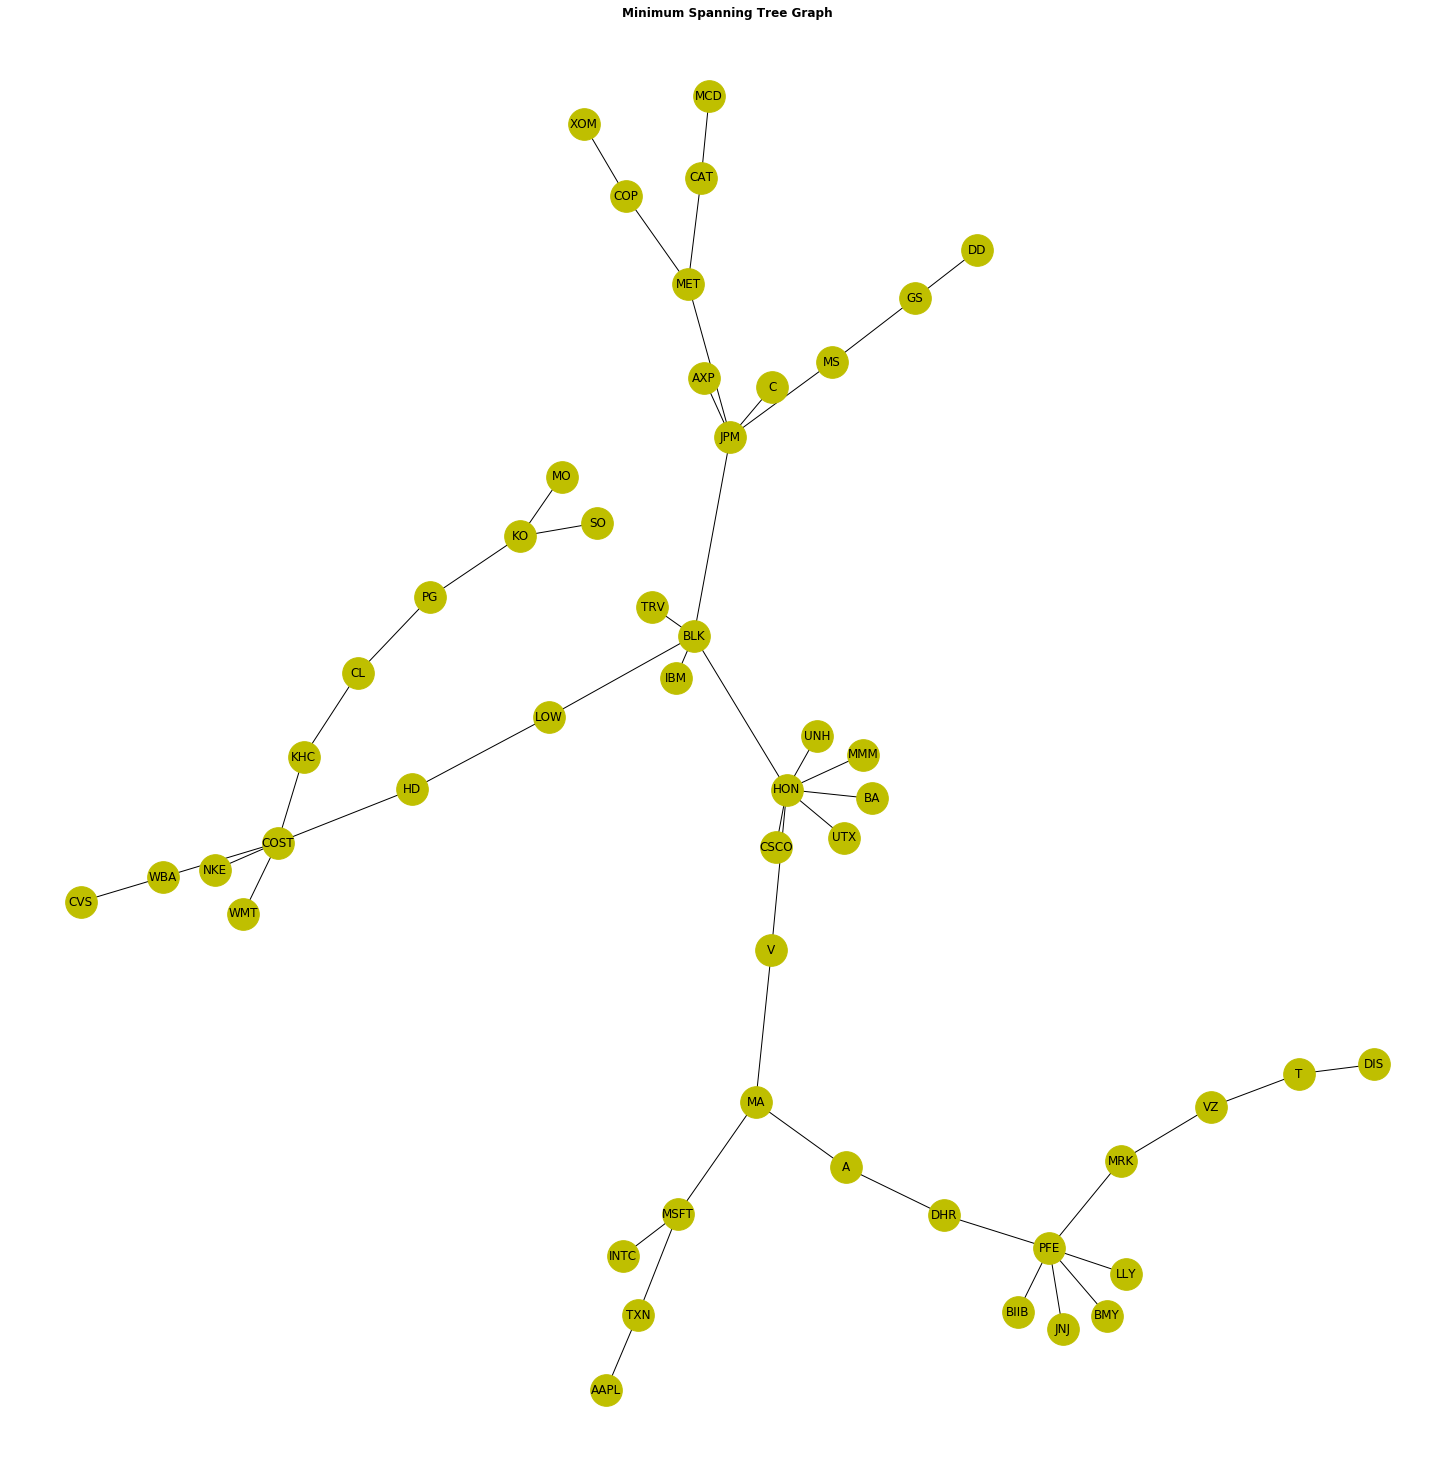

In [6]:
# show graphically how the MST
# look like with their hierarchical rank.
plt.figure(figsize=(20, 20))  # set figure_size
# draw the tree with all the labels.
nx.draw(graphing_tree, node_size=1000, node_color='y', with_labels=True)
plt.title("Minimum Spanning Tree Graph", fontweight="bold")
plt.show()  # show graphically how the MST


Here, we can see a visual representation of the minimum spanning tree and the hierarchical clustering of the distances.

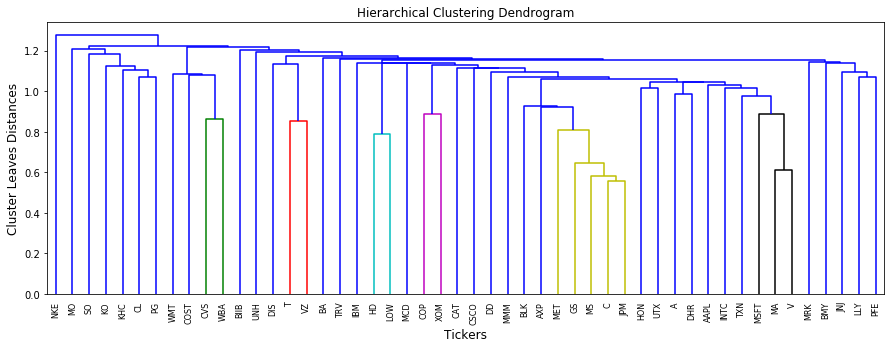

In [7]:
# Get the clusters and show the hierarchical sturcture of the distances
clusters = linkage(squareform(distances_df), method="single")
plt.figure(figsize=(15, 5))
dendrogram(clusters, labels= list_shares )
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Cluster Leaves Distances', fontsize=12)
plt.title('Hierarchical Clustering Dendrogram', fontsize=12)
plt.show()


# Conclusion

In this notebook, we saw Kruskal's algorithm implementation with some real stock market data. From the visual representation and by watching carefully the minimum spanning tree calculation, we can see that the algorithm works. The distance matrix data also made sense in relation to the market data given. The Hierarchical dendrogram also shows the ranks or heights between the distance of each pair of assets.  
